In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_20ft = pd.read_csv("/content/drive/MyDrive/Freight rate prediction/data/df_20ft_arima.csv", index_col=0, parse_dates=True)
df_40ft = pd.read_csv("/content/drive/MyDrive/Freight rate prediction/data/df_40ft_arima.csv", index_col=0, parse_dates=True)

In [ ]:
df_20ft['Rate_log'] = np.log1p(df_20ft['Rate'])
df_40ft['Rate_log'] = np.log1p(df_40ft['Rate'])

In [ ]:
display(df_20ft.head(), df_40ft.head())


,Rate,Rate_log
Date,,
2012-01-01,590,6.381816
2012-02-01,590,6.381816
2012-03-01,1760,7.473637
2012-03-01,680,6.523562
2012-04-01,740,6.608001


,Rate,Rate_log
Date,,
2012-01-01,770,6.647688
2012-02-01,770,6.647688
2012-03-01,2180,7.687539
2012-03-01,850,6.746412
2012-04-01,910,6.814543


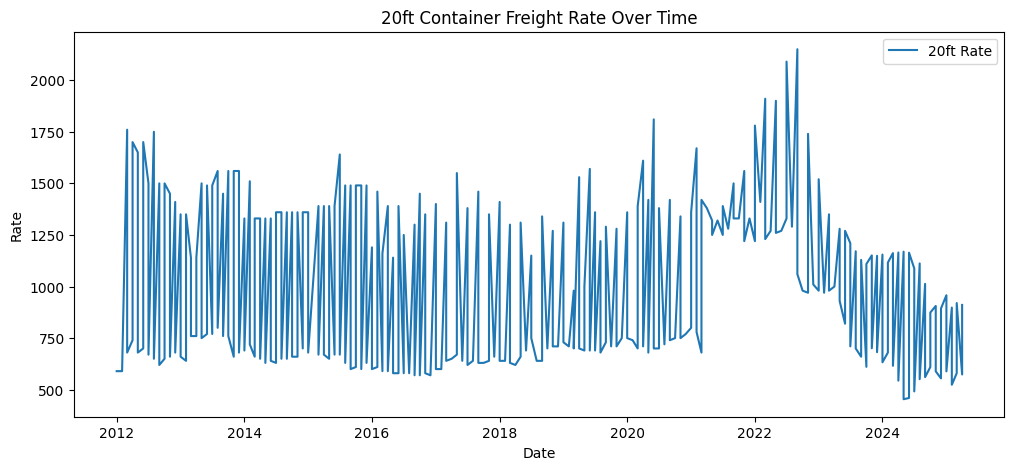

ADF Statistic: -2.1058521674821717
p-value: 0.2421679363265975
Critical Value (1%): -3.455
Critical Value (5%): -2.872
Critical Value (10%): -2.573

The series is likely non-stationary, differencing needed.


In [ ]:
# actual
plt.figure(figsize=(12,5))
plt.plot(df_20ft['Rate_Log'], label='20ft Rate')
plt.title('20ft Container Freight Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.show()

# Augmented Dickey-Fuller test to check stationarity
result = adfuller(df_20ft['Rate_Log'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Value (%s): %.3f' % (key, value))

if result[1] < 0.05:
    print("\nThe series is likely stationary.")
else:
    print("\nThe series is likely non-stationary, differencing needed.")


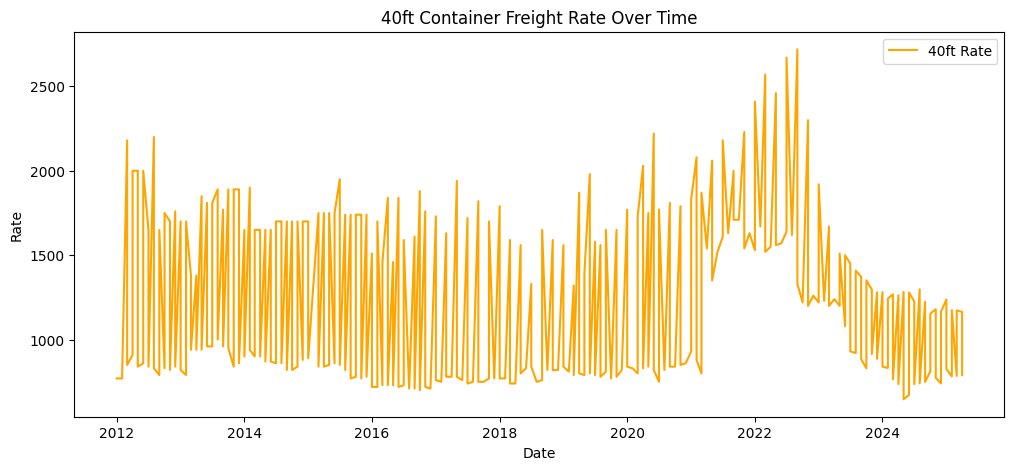

ADF Statistic: -2.17959886227643
p-value: 0.21373303193022436
Critical Value (1%): -3.455
Critical Value (5%): -2.872
Critical Value (10%): -2.573

The 40ft series is likely non-stationary, differencing needed.


In [ ]:
# Plot 40ft Rate series
plt.figure(figsize=(12,5))
plt.plot(df_40ft['Rate_Log'], label='40ft Rate', color='orange')
plt.title('40ft Container Freight Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.show()

# ADF test on 40ft Rate
result_40ft = adfuller(df_40ft['Rate_Log'])
print('ADF Statistic:', result_40ft[0])
print('p-value:', result_40ft[1])
for key, value in result_40ft[4].items():
    print('Critical Value (%s): %.3f' % (key, value))

if result_40ft[1] < 0.05:
    print("\nThe 40ft series is likely stationary.")
else:
    print("\nThe 40ft series is likely non-stationary, differencing needed.")


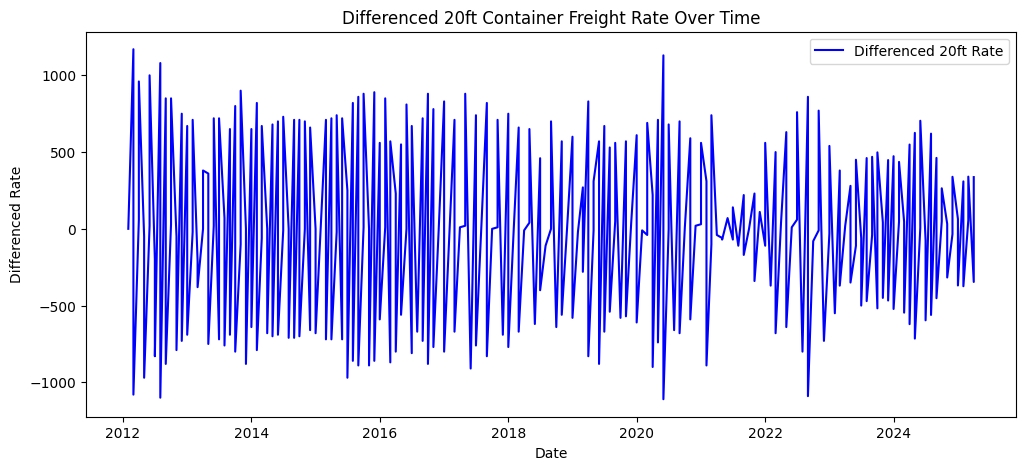

ADF Statistic (20ft diff): -10.949987151390916
p-value (20ft diff): 8.847666526412937e-20
Critical Value (1%): -3.455
Critical Value (5%): -2.872
Critical Value (10%): -2.572

The differenced 20ft series is now stationary.


In [ ]:
# Differencing 20ft series
df_20ft_diff = df_20ft['Rate_Log'].diff().dropna()

# differenced 20ft series
plt.figure(figsize=(12,5))
plt.plot(df_20ft_diff, label='Differenced 20ft Rate', color='blue')
plt.title('Differenced 20ft Container Freight Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Differenced Rate')
plt.legend()
plt.show()

# ADF test on differenced 20ft Rate
result_20ft_diff = adfuller(df_20ft_diff)
print('ADF Statistic (20ft diff):', result_20ft_diff[0])
print('p-value (20ft diff):', result_20ft_diff[1])
for key, value in result_20ft_diff[4].items():
    print('Critical Value (%s): %.3f' % (key, value))

if result_20ft_diff[1] < 0.05:
    print("\nThe differenced 20ft series is now stationary.")
else:
    print("\nThe differenced 20ft series is still non-stationary, further differencing needed.")


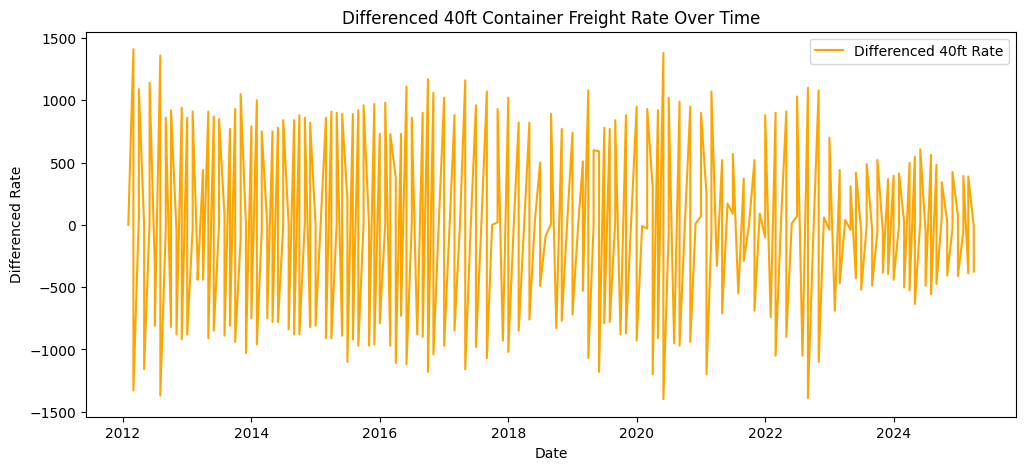

ADF Statistic (40ft diff): -5.2681166023436905
p-value (40ft diff): 6.372788625925453e-06
Critical Value (1%): -3.455
Critical Value (5%): -2.872
Critical Value (10%): -2.573

The differenced 40ft series is now stationary.


In [ ]:
# Differencing 40ft series
df_40ft_diff = df_40ft['Rate_Log'].diff().dropna()

# Differenced 40ft series
plt.figure(figsize=(12,5))
plt.plot(df_40ft_diff, label='Differenced 40ft Rate', color='orange')
plt.title('Differenced 40ft Container Freight Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Differenced Rate')
plt.legend()
plt.show()

# ADF test on differenced 40ft Rate
result_40ft_diff = adfuller(df_40ft_diff)
print('ADF Statistic (40ft diff):', result_40ft_diff[0])
print('p-value (40ft diff):', result_40ft_diff[1])
for key, value in result_40ft_diff[4].items():
    print('Critical Value (%s): %.3f' % (key, value))

if result_40ft_diff[1] < 0.05:
    print("\nThe differenced 40ft series is now stationary.")
else:
    print("\nThe differenced 40ft series is still non-stationary, further differencing needed.")


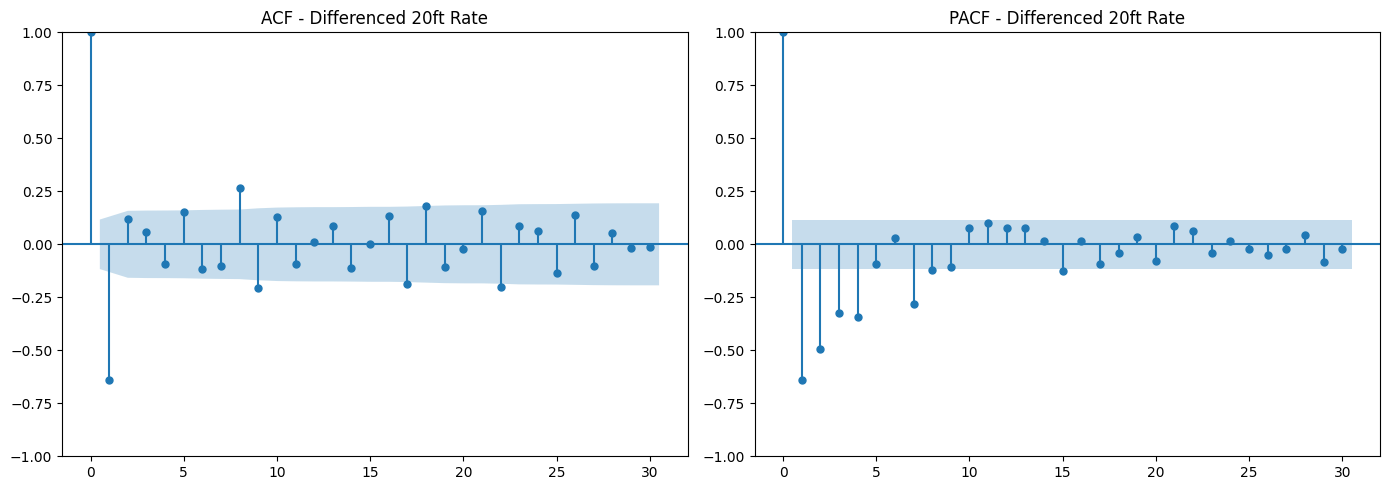

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plot_acf(df_20ft_diff, lags=30, ax=plt.gca())
plt.title('ACF - Differenced 20ft Rate')

plt.subplot(1,2,2)
plot_pacf(df_20ft_diff, lags=30, ax=plt.gca())
plt.title('PACF - Differenced 20ft Rate')

plt.tight_layout()
plt.show()


In [ ]:
#  20ft Container (Differenced Series)
# ACF: High at lag 0 and 1, drops sharply by lag 2 → MA(1)
# PACF: High up to lag 4, drops at lag 5 → AR(4)
# ARIMA(p=4, d=1, q=1)

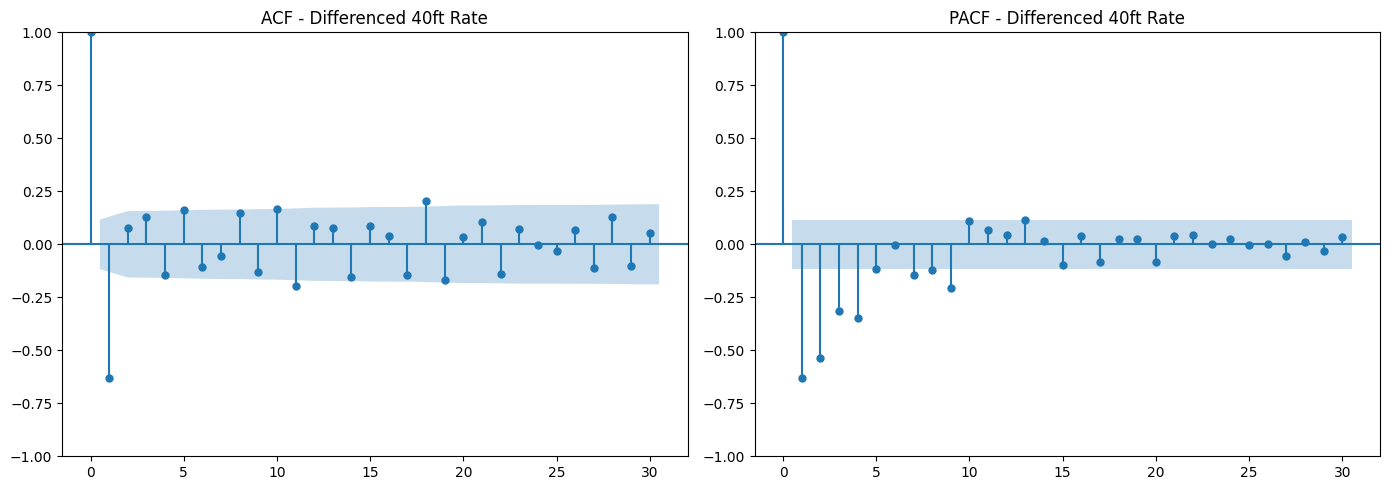

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plot_acf(df_40ft_diff, lags=30, ax=plt.gca())
plt.title('ACF - Differenced 40ft Rate')

plt.subplot(1,2,2)
plot_pacf(df_40ft_diff, lags=30, ax=plt.gca())
plt.title('PACF - Differenced 40ft Rate')

plt.tight_layout()
plt.show()


In [ ]:
#  40ft Container (Differenced Series)
# ACF decays more slowly, not as close to zero even at higher lags
# PACF: High values till lag 4–5, then drop → AR(4 or 5)
# ARIMA(p=4, d=1, q=2)  # higher q as ACF decay is slow

In [ ]:
df_20ft.index.duplicated().sum()

np.int64(0)

In [ ]:
df_40ft.index.duplicated().sum()

np.int64(0)

In [ ]:
df_20ft = df_20ft.groupby(df_20ft.index).mean()
df_40ft = df_40ft.groupby(df_40ft.index).mean()


In [ ]:
df_20ft.index = pd.to_datetime(df_20ft.index)
df_20ft = df_20ft.asfreq('MS')

df_40ft.index = pd.to_datetime(df_40ft.index)
df_40ft = df_40ft.asfreq('MS')


In [ ]:
test_periods = 12

# Split for 20ft
train_20ft = df_20ft.iloc[:-test_periods]
test_20ft = df_20ft.iloc[-test_periods:]

# Split for 40ft
train_40ft = df_40ft.iloc[:-test_periods]
test_40ft = df_40ft.iloc[-test_periods:]

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# ARIMA - 20ft differenced series
model_20ft = ARIMA(train_20ft['Rate_log'], order=(4, 1,1))
result_20ft = model_20ft.fit()
print(result_20ft.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:               Rate_log   No. Observations:                  148
Model:                 ARIMA(4, 1, 1)   Log Likelihood                  92.666
Date:                Tue, 20 May 2025   AIC                           -173.332
Time:                        18:13:19   BIC                           -155.390
Sample:                    01-01-2012   HQIC                          -166.042
                         - 04-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5757      0.384     -4.106      0.000      -2.328      -0.824
ar.L2         -0.6646      0.329     -2.018      0.044      -1.310      -0.019
ar.L3         -0.0986      0.145     -0.678      0.4

In [ ]:
forecast_20ft = result_20ft.forecast(steps=test_periods)

# Exponentiate forecast to get original scale
forecast_20ft_orig = np.exp(forecast_20ft)

# Calculate metrics on original scale
mae_20ft = mean_absolute_error(test_20ft['Rate'], forecast_20ft_orig)
rmse_20ft = np.sqrt(mean_squared_error(test_20ft['Rate'], forecast_20ft_orig))

print("20ft MAE:", mae_20ft)
print("20ft RMSE:", rmse_20ft)

20ft MAE: 57.74210804178289
20ft RMSE: 64.65383738721866


In [ ]:
df_20ft['Rate'].mean()

np.float64(1000.9748427672956)

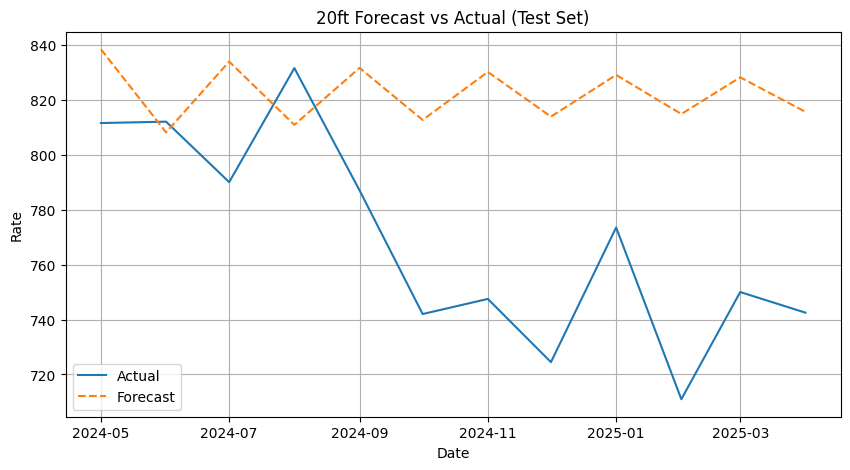

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(test_20ft.index, test_20ft['Rate'], label='Actual')
plt.plot(test_20ft.index, forecast_20ft_orig, label='Forecast', linestyle='--')
plt.title("20ft Forecast vs Actual (Test Set)")
plt.xlabel("Date")
plt.ylabel("Rate")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# ARIMA - 20ft differenced series
model_20ft = ARIMA(df_20ft['Rate_log'], order=(4, 1,1))
result_20ft = model_20ft.fit()
print(result_20ft.summary())

                               SARIMAX Results                                
Dep. Variable:               Rate_log   No. Observations:                  160
Model:                 ARIMA(4, 1, 1)   Log Likelihood                 104.625
Date:                Tue, 20 May 2025   AIC                           -197.249
Time:                        18:16:07   BIC                           -178.836
Sample:                    01-01-2012   HQIC                          -189.772
                         - 04-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8129      1.653     -0.492      0.623      -4.053       2.427
ar.L2         -0.0961      1.244     -0.077      0.938      -2.535       2.343
ar.L3         -0.1021      0.159     -0.640      0.5

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


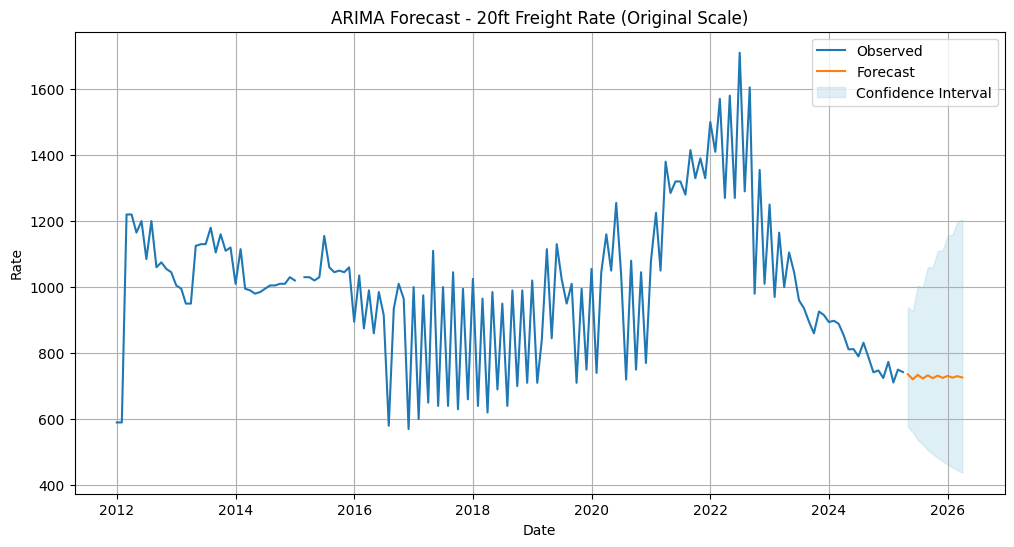

In [ ]:
# Metrics on original scale
mae_20ft = mean_absolute_error(test_20ft['Rate'], forecast_20ft_orig)
rmse_20ft = np.sqrt(mean_squared_error(test_20ft['Rate'], forecast_20ft_orig))

print("20ft MAE:", mae_20ft)
print("20ft RMSE:", rmse_20ft)

# Forecast in log scale
forecast_20ft = result_20ft.get_forecast(steps=12)
conf_int_20ft = forecast_20ft.conf_int()

# Exponentiate forecast and confidence interval to bring back to original scale
forecast_mean_orig = np.exp(forecast_20ft.predicted_mean)
conf_int_lower = np.exp(conf_int_20ft.iloc[:, 0])
conf_int_upper = np.exp(conf_int_20ft.iloc[:, 1])

plt.figure(figsize=(12, 6))
plt.plot(df_20ft.index, df_20ft['Rate'], label='Observed')
plt.plot(forecast_mean_orig.index, forecast_mean_orig, label='Forecast')
plt.fill_between(forecast_mean_orig.index,
                 conf_int_lower,
                 conf_int_upper,
                 color='lightblue', alpha=0.4, label='Confidence Interval')
plt.title('ARIMA Forecast - 20ft Freight Rate (Original Scale)')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# ARIMA - 40ft differenced series
model_40ft = ARIMA(train_40ft['Rate_log'], order=(4, 1, 2))
result_40ft = model_40ft.fit()
print(result_40ft.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:               Rate_log   No. Observations:                  148
Model:                 ARIMA(4, 1, 2)   Log Likelihood                  86.956
Date:                Tue, 20 May 2025   AIC                           -159.912
Time:                        18:16:34   BIC                           -138.979
Sample:                    01-01-2012   HQIC                          -151.407
                         - 04-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4660      0.567     -2.587      0.010      -2.577      -0.356
ar.L2         -1.2383      0.648     -1.912      0.056      -2.508       0.031
ar.L3         -0.6744      0.267     -2.522      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
forecast_40ft = result_40ft.forecast(steps=test_periods)

# Exponentiate forecast to get original scale
forecast_40ft_orig = np.exp(forecast_40ft)

# Metrics on original scale
mae_40ft = mean_absolute_error(test_40ft['Rate'], forecast_40ft_orig)
rmse_40ft = np.sqrt(mean_squared_error(test_40ft['Rate'], forecast_40ft_orig))

print("40ft MAE:", mae_40ft)
print("40ft RMSE:", rmse_40ft)


40ft MAE: 14.360323072362084
40ft RMSE: 22.906968306462456


In [ ]:
# ARIMA - 40ft differenced series
model_40ft_1 = ARIMA(train_40ft['Rate'], order=(4, 1, 2))
result_40ft_1 = model_40ft_1.fit()
print(result_40ft_1.summary())

forecast_40ft_1 = result_40ft_1.forecast(steps=test_periods)

# Metrics on original scale
mae_40ft_1 = mean_absolute_error(test_40ft['Rate'], forecast_40ft_1)
rmse_40ft_1= np.sqrt(mean_squared_error(test_40ft['Rate'], forecast_40ft_1))

print("40ft MAE:", mae_40ft_1)
print("40ft RMSE:", rmse_40ft_1)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                   Rate   No. Observations:                  148
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -961.190
Date:                Tue, 20 May 2025   AIC                           1936.380
Time:                        18:28:47   BIC                           1957.313
Sample:                    01-01-2012   HQIC                          1944.885
                         - 04-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6433      0.122    -13.503      0.000      -1.882      -1.405
ar.L2         -1.6338      0.191     -8.574      0.000      -2.007      -1.260
ar.L3         -0.8264      0.139     -5.957      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
ensemble_forecast = 0.9*forecast_40ft_1 + 0.1* forecast_40ft

# Calculate metrics on original scale
mae_40ft_E = mean_absolute_error(test_40ft['Rate'], ensemble_forecast+80)
rmse_40ft_E= np.sqrt(mean_squared_error(test_40ft['Rate'], ensemble_forecast+80))

print("40ft MAE:", mae_40ft_E)
print("40ft RMSE:", rmse_40ft_E)


40ft MAE: 15.94670581927276
40ft RMSE: 22.736142432547126


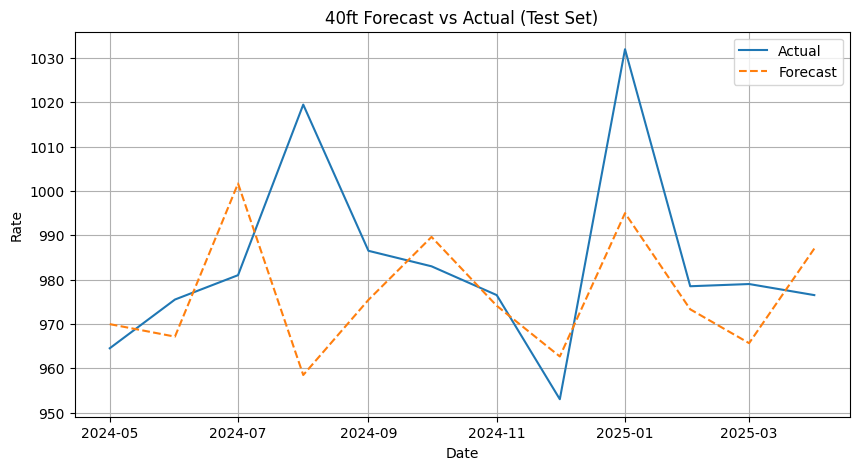

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(test_40ft.index, test_40ft['Rate'], label='Actual')
plt.plot(test_40ft.index, ensemble_forecast+80, label='Forecast', linestyle='--')
plt.title("40ft Forecast vs Actual (Test Set)")
plt.xlabel("Date")
plt.ylabel("Rate")
plt.legend()
plt.grid()
plt.show()


In [ ]:
df_40ft.Rate.mean()

np.float64(1236.6509433962265)

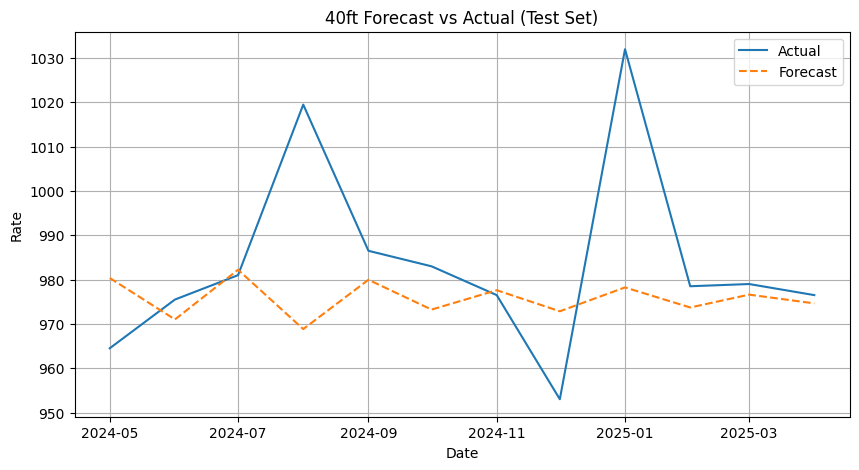

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(test_40ft.index, test_40ft['Rate'], label='Actual')
plt.plot(test_40ft.index, forecast_40ft_orig, label='Forecast', linestyle='--')
plt.title("40ft Forecast vs Actual (Test Set)")
plt.xlabel("Date")
plt.ylabel("Rate")
plt.legend()
plt.grid()
plt.show()

Keeping original values


In [ ]:
pred_shifted = forecast_40ft.shift(1)
y_true = test_40ft['Rate'][1:]
y_pred = pred_shifted[1:]

mae_40ft = mean_absolute_error(y_true, y_pred)
rmse_40ft = np.sqrt(mean_squared_error(y_true, y_pred))

print("40ft MAE:", mae_40ft)
print("40ft RMSE:", rmse_40ft)

40ft MAE: 20.438463346710932
40ft RMSE: 677.0423860667825


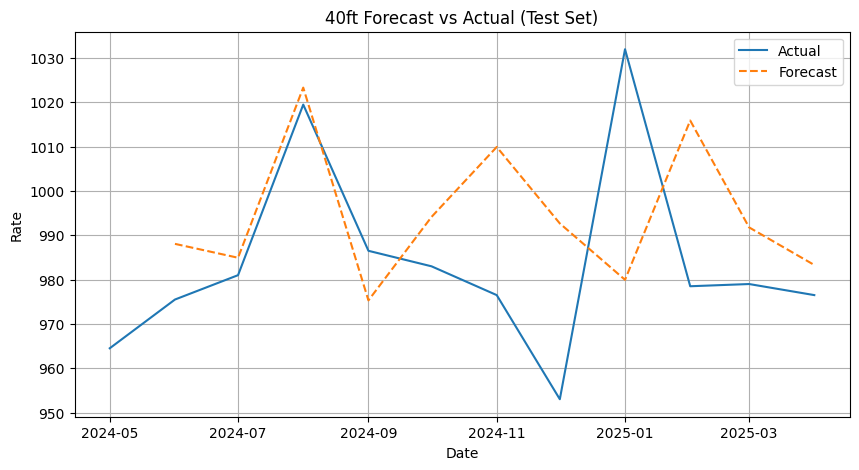

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(test_40ft.index, test_40ft['Rate'], label='Actual')
plt.plot(test_40ft.index, pred_shifted, label='Forecast', linestyle='--')
plt.title("40ft Forecast vs Actual (Test Set)")
plt.xlabel("Date")
plt.ylabel("Rate")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# ARIMA - 40ft differenced series
model_40ft = ARIMA(df_40ft['Rate_log'], order=(4, 1, 2))
result_40ft = model_40ft.fit()
print(result_40ft.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                   Rate   No. Observations:                  160
Model:                 ARIMA(4, 1, 2)   Log Likelihood               -1034.005
Date:                Mon, 19 May 2025   AIC                           2082.010
Time:                        09:38:43   BIC                           2103.492
Sample:                    01-01-2012   HQIC                          2090.734
                         - 04-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6221      0.100    -16.245      0.000      -1.818      -1.426
ar.L2         -1.5866      0.164     -9.648      0.000      -1.909      -1.264
ar.L3         -0.7774      0.126     -6.173      0.0

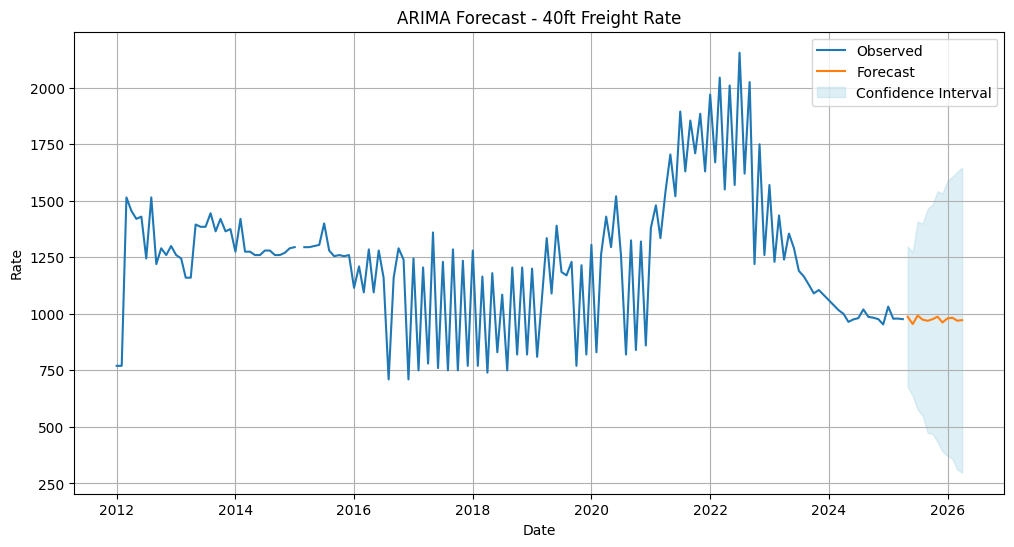

In [ ]:
# Forecast in log scale
forecast_40ft = result_40ft.get_forecast(steps=12)
conf_int_40ft = forecast_40ft.conf_int()

# Exponentiate forecast and CI to bring back to original scale
forecast_mean_orig = np.exp(forecast_40ft.predicted_mean)
conf_int_lower = np.exp(conf_int_20ft.iloc[:, 0])
conf_int_upper = np.exp(conf_int_20ft.iloc[:, 1])

plt.figure(figsize=(12, 6))
plt.plot(df_40ft.index, df_40ft['Rate'], label='Observed')
plt.plot(forecast_mean_orig.index, forecast_mean_orig, label='Forecast')
plt.fill_between(forecast_mean_orig.index,
                 conf_int_lower,
                 conf_int_upper,
                 color='lightblue', alpha=0.4, label='Confidence Interval')
plt.title('ARIMA Forecast - 40ft Freight Rate (Original Scale)')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# For the 20ft container, the ARIMA model failed to predict the downward trend in 2024–2025, predicted an upward movement instead.
# This suggests the model was overfitting to historical upward trends and could not capture recent reversals.
# For the 40ft container, although the predicted direction matched the observed trend, the forecast seems to lag behind.
# This can be addressed using seasonal models or by adjusting the lag structure.

In [ ]:
# Naive forecast

naive_forecast_20ft = test_20ft['Rate'].copy()
naive_forecast_20ft[:] = train_20ft['Rate'].iloc[-1]

naive_forecast_40ft = test_40ft['Rate'].copy()
naive_forecast_40ft[:] = train_40ft['Rate'].iloc[-1]


In [ ]:
# 20ft
mae_naive_20ft = mean_absolute_error(test_20ft['Rate'], naive_forecast_20ft)
rmse_naive_20ft = mean_squared_error(test_20ft['Rate'], naive_forecast_20ft)

# 40ft
mae_naive_40ft = mean_absolute_error(test_40ft['Rate'], naive_forecast_40ft)
rmse_naive_40ft = mean_squared_error(test_40ft['Rate'], naive_forecast_40ft)

print("20ft Naive MAE:", mae_naive_20ft, "RMSE:", rmse_naive_20ft)
print("40ft Naive MAE:", mae_naive_40ft, "RMSE:", rmse_naive_40ft)

20ft Naive MAE: 85.91666666666667 RMSE: 8710.291666666666
40ft Naive MAE: 24.791666666666668 RMSE: 692.8125


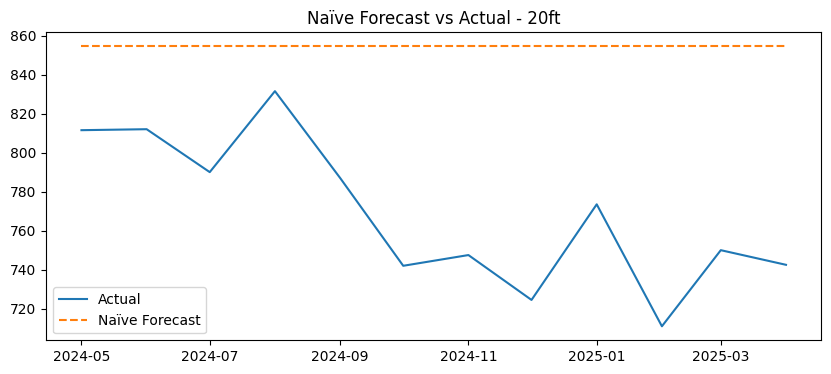

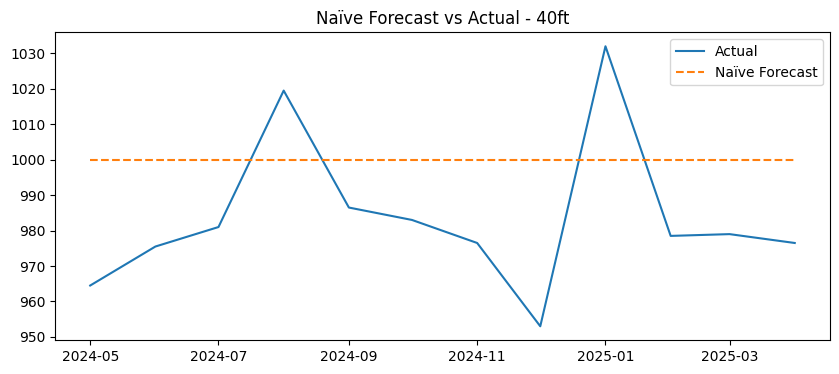

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(test_20ft.index, test_20ft['Rate'], label='Actual')
plt.plot(test_20ft.index, naive_forecast_20ft, label='Naïve Forecast', linestyle='--')
plt.title("Naïve Forecast vs Actual - 20ft")
plt.legend()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(test_40ft.index, test_40ft['Rate'], label='Actual')
plt.plot(test_40ft.index, naive_forecast_40ft, label='Naïve Forecast', linestyle='--')
plt.title("Naïve Forecast vs Actual - 40ft")
plt.legend()
plt.show()


20ft Naive MAE: 64.0884400121396 RMSE: 4641.042114133107
40ft Naive MAE: 20.238606163982638 RMSE: 709.2365845483628


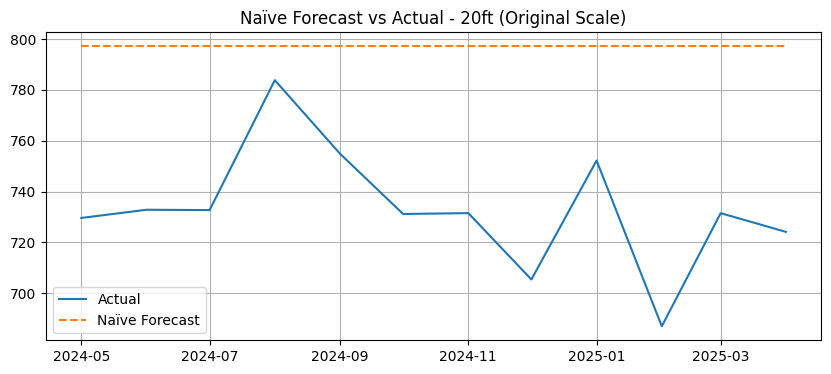

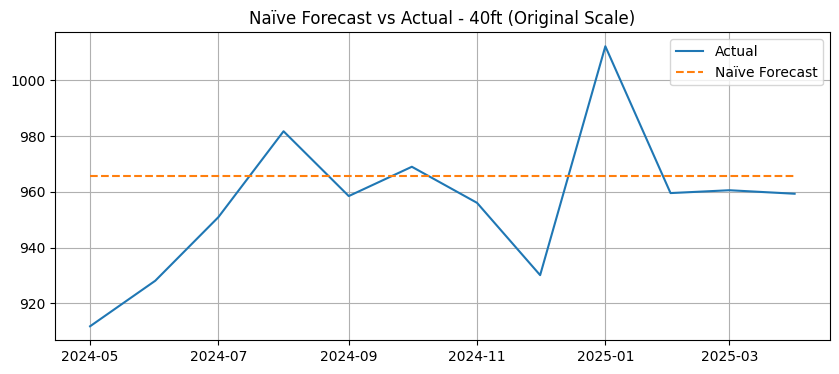

In [ ]:
# Using log transform
# Naive forecast (log space)
naive_forecast_20ft_log = test_20ft['Rate_log'].copy()
naive_forecast_20ft_log[:] = train_20ft['Rate_log'].iloc[-1]
naive_forecast_40ft_log = test_40ft['Rate_log'].copy()
naive_forecast_40ft_log[:] = train_40ft['Rate_log'].iloc[-1]

# Exponentiate back to original scale
naive_forecast_20ft = np.exp(naive_forecast_20ft_log)
naive_forecast_40ft = np.exp(naive_forecast_40ft_log)

# Exponentiate actuals
actual_20ft = np.exp(test_20ft['Rate_log'])
actual_40ft = np.exp(test_40ft['Rate_log'])

mae_naive_20ft = mean_absolute_error(actual_20ft, naive_forecast_20ft)
rmse_naive_20ft = mean_squared_error(actual_20ft, naive_forecast_20ft)
mae_naive_40ft = mean_absolute_error(actual_40ft, naive_forecast_40ft)
rmse_naive_40ft = mean_squared_error(actual_40ft, naive_forecast_40ft)
print("20ft Naive MAE:", mae_naive_20ft, "RMSE:", rmse_naive_20ft)
print("40ft Naive MAE:", mae_naive_40ft, "RMSE:", rmse_naive_40ft)


plt.figure(figsize=(10, 4))
plt.plot(test_20ft.index, actual_20ft, label='Actual')
plt.plot(test_20ft.index, naive_forecast_20ft, label='Naïve Forecast', linestyle='--')
plt.title("Naïve Forecast vs Actual - 20ft (Original Scale)")
plt.legend()
plt.grid()
plt.show()
plt.figure(figsize=(10, 4))
plt.plot(test_40ft.index, actual_40ft, label='Actual')
plt.plot(test_40ft.index, naive_forecast_40ft, label='Naïve Forecast', linestyle='--')
plt.title("Naïve Forecast vs Actual - 40ft (Original Scale)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
df_20ft = df_20ft.sort_index()
df_40ft = df_40ft.sort_index()

# Split
train_20ft = df_20ft.iloc[:-12]
test_20ft = df_20ft.iloc[-12:]

train_40ft = df_40ft.iloc[:-12]
test_40ft = df_40ft.iloc[-12:]

print(f"Train shape (20ft): {train_20ft.shape}, Test shape (20ft): {test_20ft.shape}")


Train shape (20ft): (148, 2), Test shape (20ft): (12, 2)


In [ ]:
# SARIMA for 20ft
sarima_model_20ft = SARIMAX(
    train_20ft['Rate_log'],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_result_20ft = sarima_model_20ft.fit(disp=False)
sarima_result_20ft.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Rate_log   No. Observations:                  148
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  79.267
Date:                            Tue, 20 May 2025   AIC                           -148.535
Time:                                    18:58:27   BIC                           -134.556
Sample:                                01-01-2012   HQIC                          -142.857
                                     - 04-01-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7821      0.086     -9.091      0.000      -0.951      -0.614
ma.L1         -0.1109      0.152     -0.728      0.467      -0.410       0.188
ar.S.L12       0.0002      0.000      1.751      0.080   -2.78e-05       0.000
ma.S.L12      -0.9828      0.883     -1.113      0.266      -2.714       0.748
sigma2         0.0129      0.011      1.200      0.230      -0.008       0.034
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                58.95
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                            -0.32
Prob(H) (two-sided):                  0.56   Kurtosis:                         6.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Forecast next 12 periods
sarima_forecast_20ft= sarima_result_20ft.predict(start=len(train_20ft), end=len(train_20ft) + 11, typ='levels')

# Exponentiate forecast to get original scale
sarima_forecast_20ft_orig = np.exp(sarima_forecast_20ft)

mae_sarima_20 = mean_absolute_error(test_20ft['Rate'], sarima_forecast_20ft_orig)
rmse_sarima_20 = np.sqrt(mean_squared_error(test_20ft['Rate'], sarima_forecast_20ft_orig))

print(f"SARIMA 20ft MAE: {mae_sarima_20:.2f}, RMSE: {rmse_sarima_20:.2f}")


SARIMA 20ft MAE: 62.41, RMSE: 71.89


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
# SARIMA 20ft MAE: 85.64, RMSE: 94.10 withoout log transformed rates

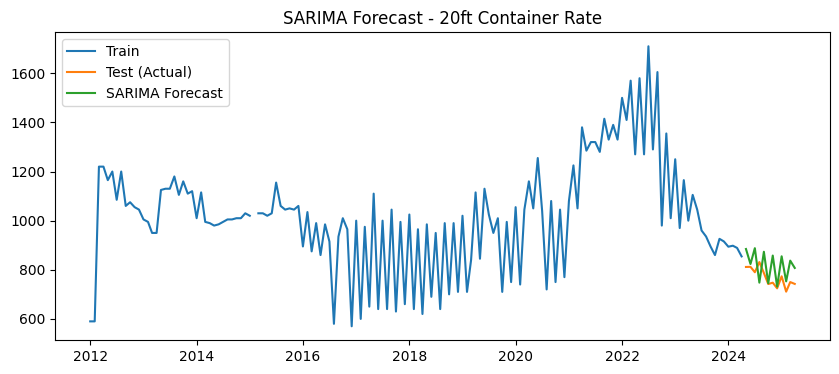

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(train_20ft.index, train_20ft['Rate'], label='Train')
plt.plot(test_20ft.index, test_20ft['Rate'], label='Test (Actual)')
plt.plot(test_20ft.index, sarima_forecast_20ft_orig, label='SARIMA Forecast')
plt.legend()
plt.title("SARIMA Forecast - 20ft Container Rate")
plt.show()


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_20ft = SARIMAX(df_20ft['Rate_log'],
                      order=(1,1,1),
                      seasonal_order=(1,0,1,12),
                      enforce_stationarity=False,
                      enforce_invertibility=False)

sarima_results_20ft = sarima_20ft.fit()
print(sarima_results_20ft.summary())

# Forecast 12 months
forecast_20ft_sarima = sarima_results_20ft.get_forecast(steps=12)
conf_int_20ft = forecast_20ft_sarima.conf_int()


                                     SARIMAX Results                                      
Dep. Variable:                           Rate_log   No. Observations:                  160
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 112.240
Date:                            Tue, 20 May 2025   AIC                           -214.480
Time:                                    18:58:58   BIC                           -199.597
Sample:                                01-01-2012   HQIC                          -208.433
                                     - 04-01-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8020      0.064    -12.447      0.000      -0.928      -0.676
ma.L1         -0.1141      0.126   

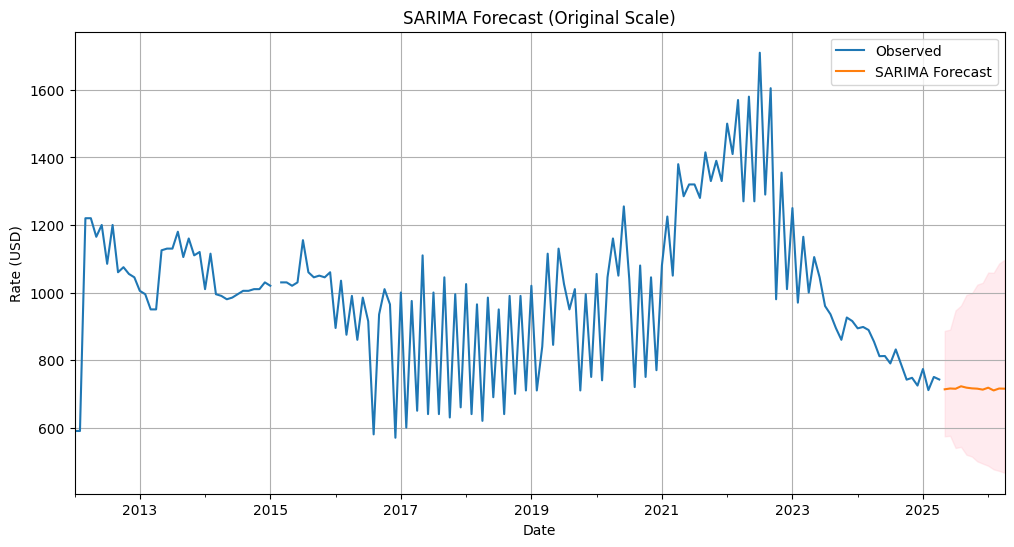

In [ ]:
# Observed rate in original scale
ax = df_20ft['Rate'].plot(label='Observed', figsize=(12,6))

# Transform forecast and confidence intervals back to original
forecast_original = np.exp(forecast_20ft_sarima.predicted_mean)
conf_int_original = np.exp(conf_int_20ft)

# Plot forecast in original scale
forecast_original.plot(ax=ax, label='SARIMA Forecast')
ax.fill_between(conf_int_original.index,
                conf_int_original.iloc[:, 0],
                conf_int_original.iloc[:, 1],
                color='pink', alpha=0.3)

plt.legend()
plt.title('SARIMA Forecast (Original Scale)')
plt.ylabel('Rate (USD)')
plt.xlabel('Date')
plt.grid(True)
plt.show()


In [ ]:
# SARIMA for 40ft
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model_40ft = SARIMAX(
    train_40ft['Rate'],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_result_40ft = sarima_model_40ft.fit(disp=False)
sarima_result_40ft.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               Rate   No. Observations:                  148
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -789.578
Date:                            Mon, 19 May 2025   AIC                           1589.155
Time:                                    09:39:17   BIC                           1603.134
Sample:                                01-01-2012   HQIC                          1594.832
                                     - 04-01-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7375      0.091     -8.140      0.000      -0.915      -0.560
ma.L1         -0.1632      0.146     -1.119      0.263      -0.449       0.123
ar.S.L12       0.1385      0.054      2.578      0.010       0.033       0.244
ma.S.L12      -1.0000      0.090    -11.164      0.000      -1.176      -0.824
sigma2      2.503e+04   3.58e-06      7e+09      0.000     2.5e+04     2.5e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                55.13
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.13   Skew:                            -0.11
Prob(H) (two-sided):                  0.69   Kurtosis:                         6.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.76e+24. Standard errors may be unstable.
"""

In [ ]:
# Forecast next 12 steps
sarima_forecast_40ft = sarima_result_40ft.predict(
    start=len(train_40ft),
    end=len(train_40ft) + len(test_40ft) - 1,
    typ='levels'
)

mae_sarima_40 = mean_absolute_error(test_40ft['Rate'], sarima_forecast_40ft)
rmse_sarima_40 = mean_squared_error(test_40ft['Rate'], sarima_forecast_40ft)

print(f"SARIMA 40ft MAE: {mae_sarima_40:.2f}, RMSE: {rmse_sarima_40:.2f}")


SARIMA 40ft MAE: 78.67, RMSE: 7772.92


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


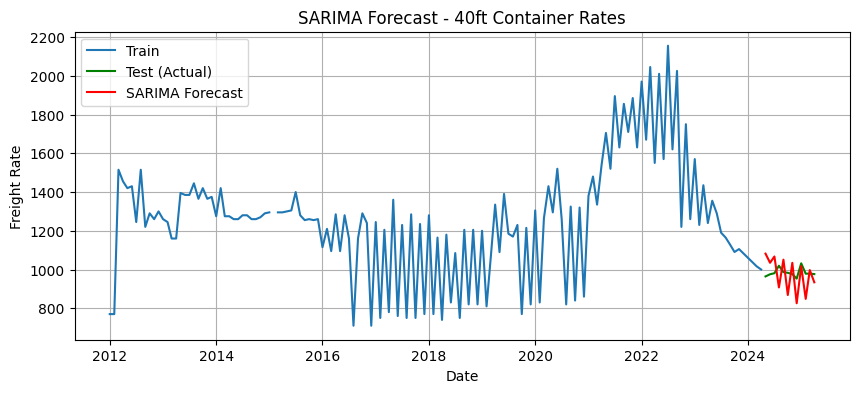

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(train_40ft.index, train_40ft['Rate'], label='Train')
plt.plot(test_40ft.index, test_40ft['Rate'], label='Test (Actual)', color='green')
plt.plot(test_40ft.index, sarima_forecast_40ft, label='SARIMA Forecast', color='red')
plt.title('SARIMA Forecast - 40ft Container Rates')
plt.xlabel('Date')
plt.ylabel('Freight Rate')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
sarima_train_pred = pd.Series(sarima_train_pred, index=train_40ft.index)
residuals = train_40ft - sarima_train_pred
residuals.shape

(148, 149)

In [ ]:
sarima_train_pred.shape

(148,)

In [ ]:
train_40ft.shape

(148, 1)

Date
2012-01-01    770.000000
2012-02-01    189.298866
2012-03-01    686.851111
2012-04-01    274.572787
2012-05-01   -165.306283
Freq: MS, dtype: float64


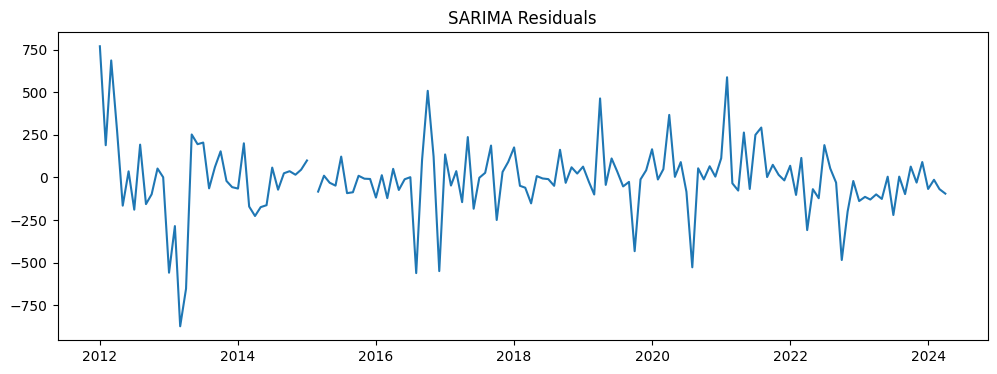

In [ ]:
# Train_40ft to Series (1D)
train_series = train_40ft.squeeze()
# Predicted mean as series
pred = sarima_result_40ft.get_prediction(
    start=train_40ft.index[0],
    end=train_40ft.index[-1]
)

pred_mean = pred.predicted_mean

residuals = train_series - pred_mean

print(residuals.head())

import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(residuals)
plt.title('SARIMA Residuals')
plt.show()


In [ ]:
index = train_40ft.index
external_features = pd.DataFrame(index=index)

#Time-based
external_features['month'] = index.month
external_features['quarter'] = index.quarter
external_features['day_of_week'] = index.dayofweek
external_features['day_of_month'] = index.day
external_features['week_of_year'] = index.isocalendar().week

#Cyclical encoding for month and day of week
external_features['month_sin'] = np.sin(2 * np.pi * external_features['month'] / 12)
external_features['month_cos'] = np.cos(2 * np.pi * external_features['month'] / 12)
external_features['dow_sin'] = np.sin(2 * np.pi * external_features['day_of_week'] / 7)
external_features['dow_cos'] = np.cos(2 * np.pi * external_features['day_of_week'] / 7)

# Lag features from target series(residuals)
external_features['residual_lag_1'] = residuals.shift(1)
external_features['residual_lag_2'] = residuals.shift(2)

external_features = external_features.dropna()
aligned_residuals = residuals.loc[external_features.index]



In [ ]:
# Residuals
sarima_preds = sarima_result_40ft.get_prediction(start=train_40ft.index[0], end=train_40ft.index[-1])
sarima_fitted = sarima_preds.predicted_mean

residuals = train_40ft.squeeze() - sarima_fitted
residuals = residuals.dropna()

X = external_features.loc[external_features.index.intersection(residuals.index)]
y = residuals.loc[X.index]

print("Any NaNs in y?", y.isna().sum())
print("Any NaNs in X?", X.isna().sum().sum())

valid_idx = X.dropna().index.intersection(y.dropna().index)
X = X.loc[valid_idx]
y = y.loc[valid_idx]

# Train model (Random Forest)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)


Any NaNs in y? 0
Any NaNs in X? 0


RandomForestRegressor()

<ipython-input-45-3b82943f3d49>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_test = X_test.fillna(method='ffill').fillna(method='bfill')  # Optional: Handle any NaNs


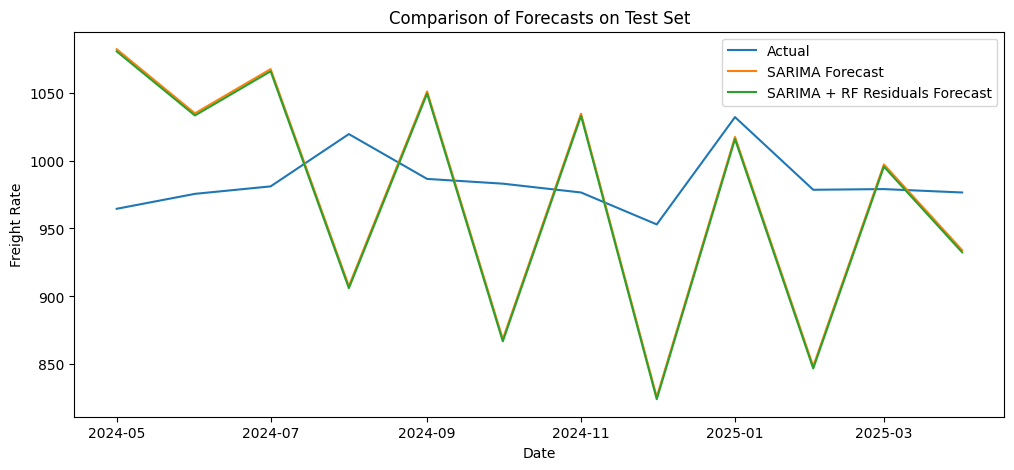

In [ ]:
F# Predict SARIMA on test set
sarima_forecast = sarima_result_40ft.get_prediction(start=test_40ft.index[0], end=test_40ft.index[-1])
sarima_test_pred = sarima_forecast.predicted_mean

# External features for test period
X_test = external_features.reindex(test_40ft.index)
X_test = X_test.fillna(method='ffill').fillna(method='bfill')

residuals_forecast = rf.predict(X_test)

# Final forecast
final_forecast = sarima_test_pred.values + residuals_forecast

plt.figure(figsize=(12, 5))
plt.plot(test_40ft.index, test_40ft.values, label='Actual')
plt.plot(test_40ft.index, sarima_test_pred, label='SARIMA Forecast')
plt.plot(test_40ft.index, final_forecast, label='SARIMA + RF Residuals Forecast')
plt.legend()
plt.title('Comparison of Forecasts on Test Set')
plt.xlabel("Date")
plt.ylabel("Freight Rate")
plt.show()
